In [1]:
import pandas as pd
import numpy as np

utility1 = pd.read_csv('./Data/Utility_1_data.csv')
utility2 = pd.read_csv('./Data/Utility_2_data.csv')
utility3 = pd.read_csv('./Data/Utility_3_data.csv')

In [2]:
def get_sample_data(utility_df, num_samples=5):
    return utility_df.head(num_samples)

sample_utility1 = get_sample_data(utility1)
sample_utility2 = get_sample_data(utility2)
sample_utility3 = get_sample_data(utility3)
print("Sample data from Utility 1:")
print(sample_utility1)
print("\n\nSample data from Utility 2:")
print(sample_utility2)
print("\n\nSample data from Utility 3:")
print(sample_utility3)

Sample data from Utility 1:
  utility_name         timestamp     load
0    Utility 1  05/01/2022 01:00  9624.30
1    Utility 1  05/01/2022 02:00  9303.29
2    Utility 1  05/01/2022 03:00  9144.32
3    Utility 1  05/01/2022 04:00  9109.75
4    Utility 1  05/01/2022 05:00  9203.98


Sample data from Utility 2:
  utility_name         timestamp      load
0    Utility 2  05/01/2023 01:00  10158.74
1    Utility 2  05/01/2023 02:00   9789.59
2    Utility 2  05/01/2023 03:00   9610.06
3    Utility 2  05/01/2023 04:00   9485.40
4    Utility 2  05/01/2023 05:00   9505.73


Sample data from Utility 3:
  utility_name         timestamp      load
0    Utility 3  05/01/2024 01:00  10253.99
1    Utility 3  05/01/2024 02:00   9945.06
2    Utility 3  05/01/2024 03:00   9735.60
3    Utility 3  05/01/2024 04:00   9679.14
4    Utility 3  05/01/2024 05:00   9907.17


In [3]:
def convert_to_datetime(utility_df, date_column):
    utility_df[date_column] = pd.to_datetime(utility_df[date_column], format='%m/%d/%Y %H:%M')
    return utility_df

utility1 = convert_to_datetime(utility1, 'timestamp')
utility2 = convert_to_datetime(utility2, 'timestamp')
utility3 = convert_to_datetime(utility3, 'timestamp')

In [4]:
def get_df_info(utility_df):
    print("DataFrame Info:")
    print(utility_df.info())
    print("\nMissing values per column:")
    print(utility_df.isnull().sum())
    print("\nStatistical summary:")
    print(utility_df.describe())

print("Utility 1 DataFrame Info:")
get_df_info(utility1)
print("\n\nUtility 2 DataFrame Info:")
get_df_info(utility2)
print("\n\nUtility 3 DataFrame Info:")
get_df_info(utility3)

Utility 1 DataFrame Info:
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   utility_name  2160 non-null   object        
 1   timestamp     2160 non-null   datetime64[ns]
 2   load          2160 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 50.8+ KB
None

Missing values per column:
utility_name    0
timestamp       0
load            0
dtype: int64

Statistical summary:
                           timestamp          load
count                           2160   2160.000000
mean   2022-06-15 00:30:00.000000256  13498.983722
min              2022-05-01 01:00:00   8156.400000
25%              2022-05-23 12:45:00  11248.922500
50%              2022-06-15 00:30:00  12901.415000
75%              2022-07-07 12:15:00  15145.592500
max              2022-07-30 00:00:00  24232.940000


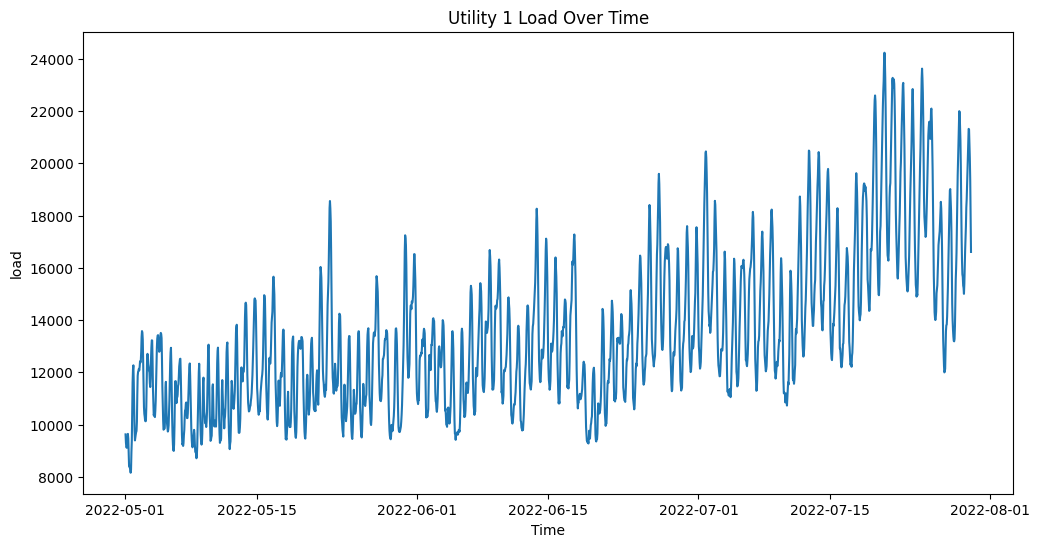

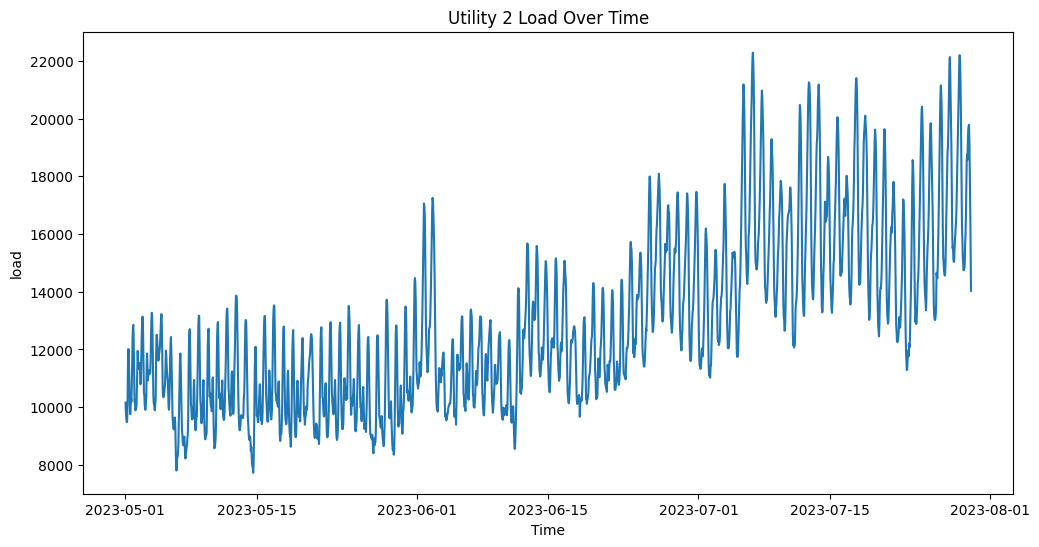

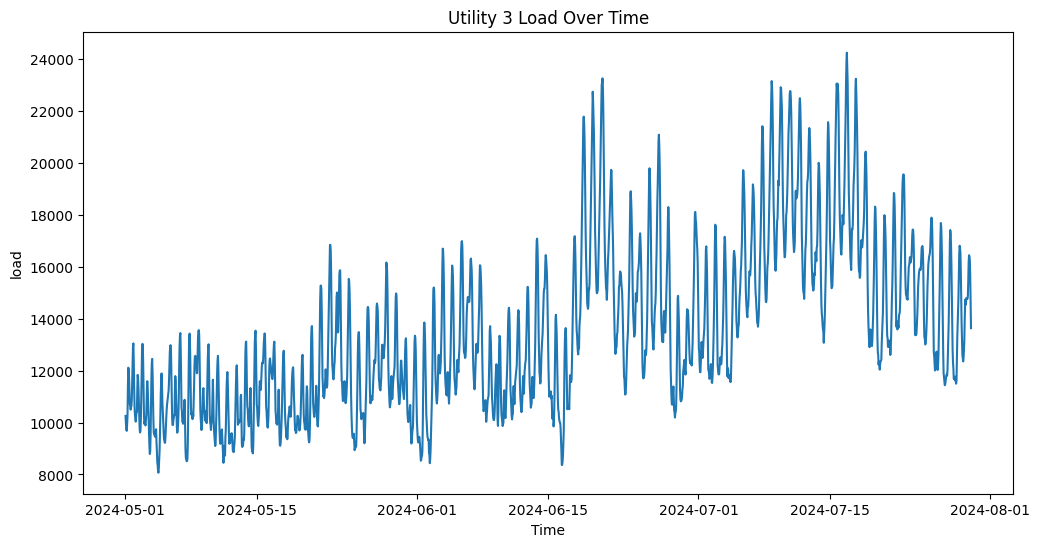

In [5]:
def time_series_plot(utility_df, date_column = 'timestamp', value_column = 'load', title='Time Series Plot'):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 6))
    plt.plot(utility_df[date_column], utility_df[value_column])
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel(value_column)
    plt.show()

time_series_plot(utility1, title='Utility 1 Load Over Time')
time_series_plot(utility2, title='Utility 2 Load Over Time')
time_series_plot(utility3, title='Utility 3 Load Over Time')    

In [6]:
def min_max_date(utility_df, date_column='timestamp'):
    min_date = utility_df[date_column].min()
    max_date = utility_df[date_column].max()
    return min_date, max_date

min_date1, max_date1 = min_max_date(utility1)
min_date2, max_date2 = min_max_date(utility2)
min_date3, max_date3 = min_max_date(utility3)   

print(f"Utility 1 Date Range: {min_date1} to {max_date1}")
print(f"Utility 2 Date Range: {min_date2} to {max_date2}")
print(f"Utility 3 Date Range: {min_date3} to {max_date3}")

Utility 1 Date Range: 2022-05-01 01:00:00 to 2022-07-30 00:00:00
Utility 2 Date Range: 2023-05-01 01:00:00 to 2023-07-30 00:00:00
Utility 3 Date Range: 2024-05-01 01:00:00 to 2024-07-30 00:00:00


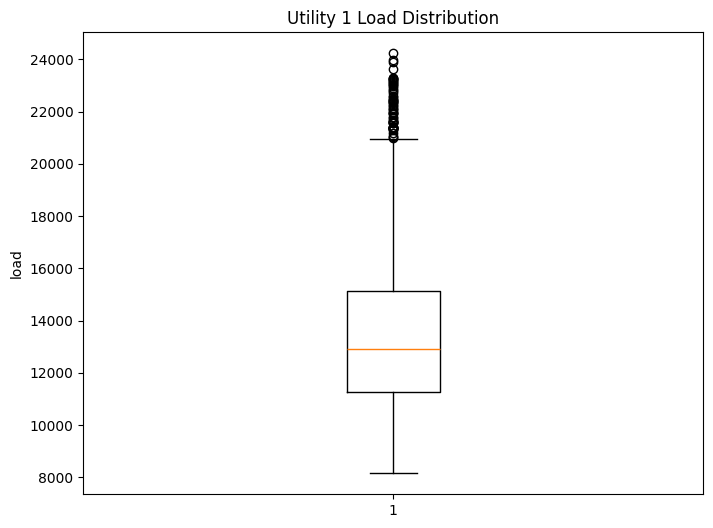

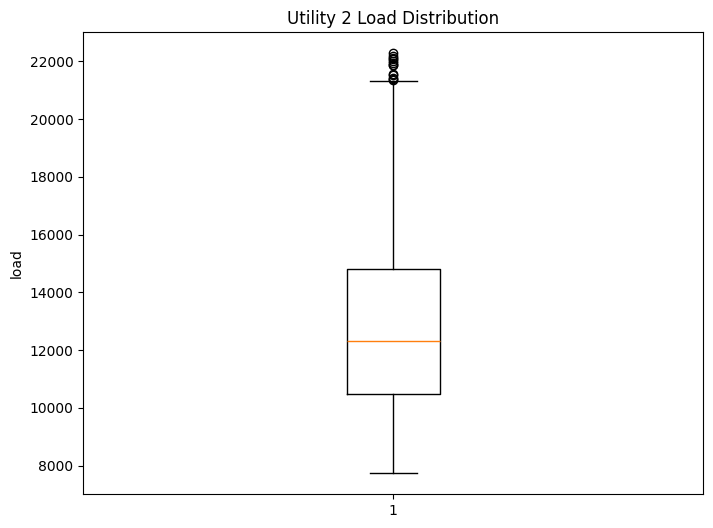

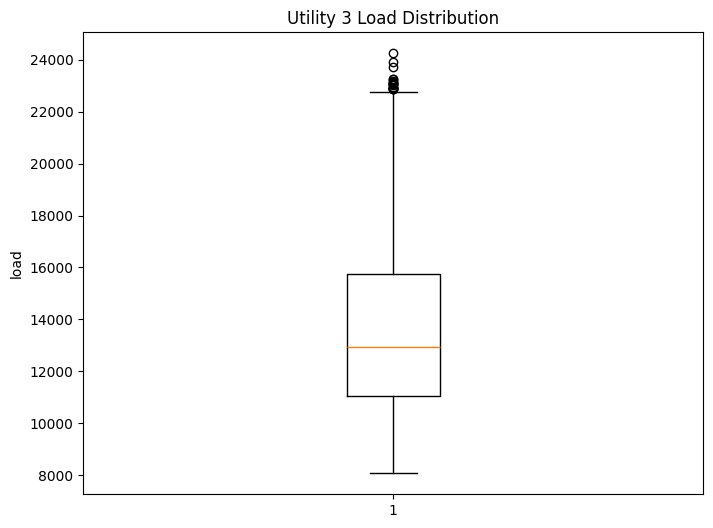

In [7]:
def box_plot(utility_df, value_column='load', title='Box Plot'):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(8, 6))
    plt.boxplot(utility_df[value_column].dropna())
    plt.title(title)
    plt.ylabel(value_column)
    plt.show()

box_plot(utility1, title='Utility 1 Load Distribution')
box_plot(utility2, title='Utility 2 Load Distribution')
box_plot(utility3, title='Utility 3 Load Distribution')

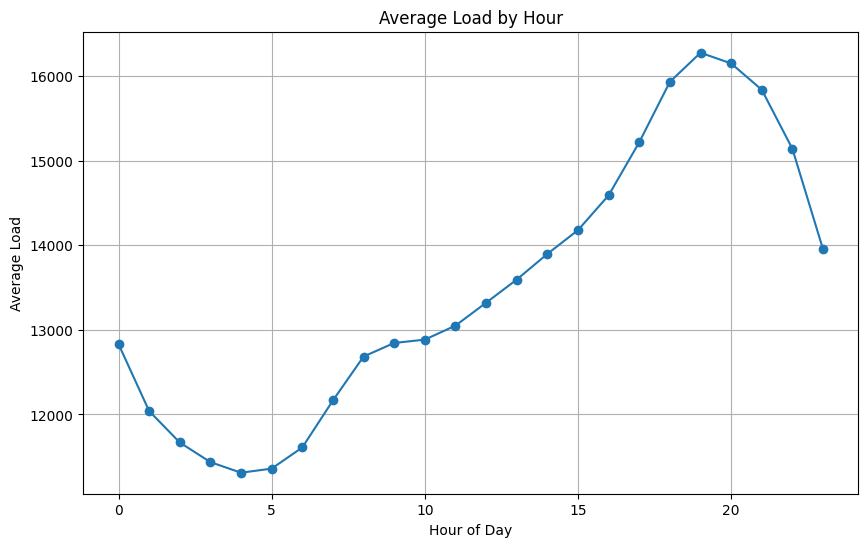

Highest average load at hour: 19
Lowest average load at hour: 4


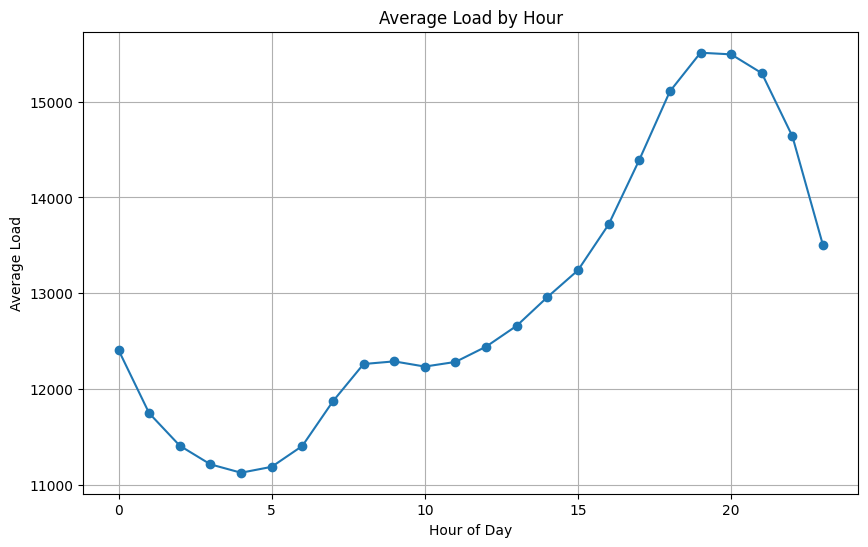

Highest average load at hour: 19
Lowest average load at hour: 4


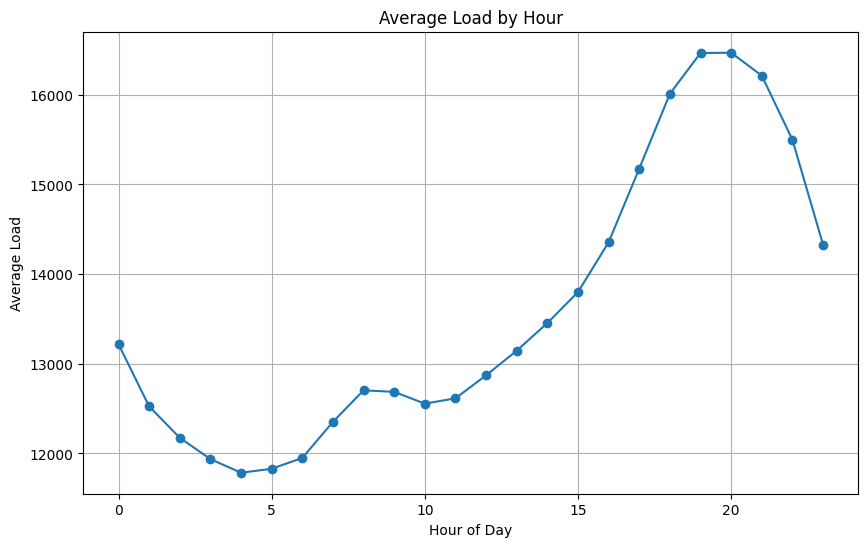

Highest average load at hour: 20
Lowest average load at hour: 4


In [8]:
def load_plot_by_hour(utility_df, date_column='timestamp', value_column='load'):
    import matplotlib.pyplot as plt
    utility_df['hour'] = utility_df[date_column].dt.hour
    hourly_load = utility_df.groupby('hour')[value_column].mean()

    plt.figure(figsize=(10, 6))
    plt.plot(hourly_load.index, hourly_load.values, marker='o')
    plt.title('Average Load by Hour')
    plt.xlabel('Hour of Day')
    plt.ylabel('Average Load')
    plt.grid(True)
    plt.show()

    # Need at what hour the load is highest and lowest
    highest_hour = hourly_load.idxmax()
    lowest_hour = hourly_load.idxmin()  
    print(f'Highest average load at hour: {highest_hour}')
    print(f'Lowest average load at hour: {lowest_hour}')


load_plot_by_hour(utility1)
load_plot_by_hour(utility2)
load_plot_by_hour(utility3)

In [9]:
from statsmodels.tsa.stattools import adfuller, kpss
def test_stationarity(utility_df, value_column='load'):
    # ADF Test
    adf_result = adfuller(utility_df[value_column].dropna())
    print('ADF Statistic:', adf_result[0])
    print('p-value:', adf_result[1])
    for key, value in adf_result[4].items():
        print('Critical Value (%s): %.3f' % (key, value))
    
    # KPSS Test
    kpss_result = kpss(utility_df[value_column].dropna(), regression='c')
    print('\nKPSS Statistic:', kpss_result[0])
    print('p-value:', kpss_result[1])
    for key, value in kpss_result[3].items():
        print('Critical Value (%s): %.3f' % (key, value))

print("Utility 1 Stationarity Test:")
test_stationarity(utility1)
print("\n\nUtility 2 Stationarity Test:")
test_stationarity(utility2)
print("\n\nUtility 3 Stationarity Test:")
test_stationarity(utility3)

Utility 1 Stationarity Test:
ADF Statistic: -2.94919019775765
p-value: 0.03991960639727403
Critical Value (1%): -3.433
Critical Value (5%): -2.863
Critical Value (10%): -2.567

KPSS Statistic: 5.329858297346551
p-value: 0.01
Critical Value (10%): 0.347
Critical Value (5%): 0.463
Critical Value (2.5%): 0.574
Critical Value (1%): 0.739


Utility 2 Stationarity Test:
ADF Statistic: -1.9064264203387673
p-value: 0.32904398547995517
Critical Value (1%): -3.433
Critical Value (5%): -2.863
Critical Value (10%): -2.567

KPSS Statistic: 6.420988233197092
p-value: 0.01
Critical Value (10%): 0.347
Critical Value (5%): 0.463
Critical Value (2.5%): 0.574
Critical Value (1%): 0.739


Utility 3 Stationarity Test:
ADF Statistic: -2.6818241509475285
p-value: 0.07723663967468324
Critical Value (1%): -3.433
Critical Value (5%): -2.863
Critical Value (10%): -2.567

KPSS Statistic: 4.90936804003958
p-value: 0.01
Critical Value (10%): 0.347
Critical Value (5%): 0.463
Critical Value (2.5%): 0.574
Critical Val

C:\Users\sales\AppData\Local\Temp\ipykernel_26276\1930672778.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(utility_df[value_column].dropna(), regression='c')
C:\Users\sales\AppData\Local\Temp\ipykernel_26276\1930672778.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(utility_df[value_column].dropna(), regression='c')
C:\Users\sales\AppData\Local\Temp\ipykernel_26276\1930672778.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(utility_df[value_column].dropna(), regression='c')


Based on these results, utility 1 is a bit mixed(stationary + non stationary) but utility 2 & 3 are clearly non stationary

ADF Statistic: -8.460290694642472
p-value: 1.5740105358712882e-13
KPSS Statistic: 0.004584868093838346
p-value: 0.1


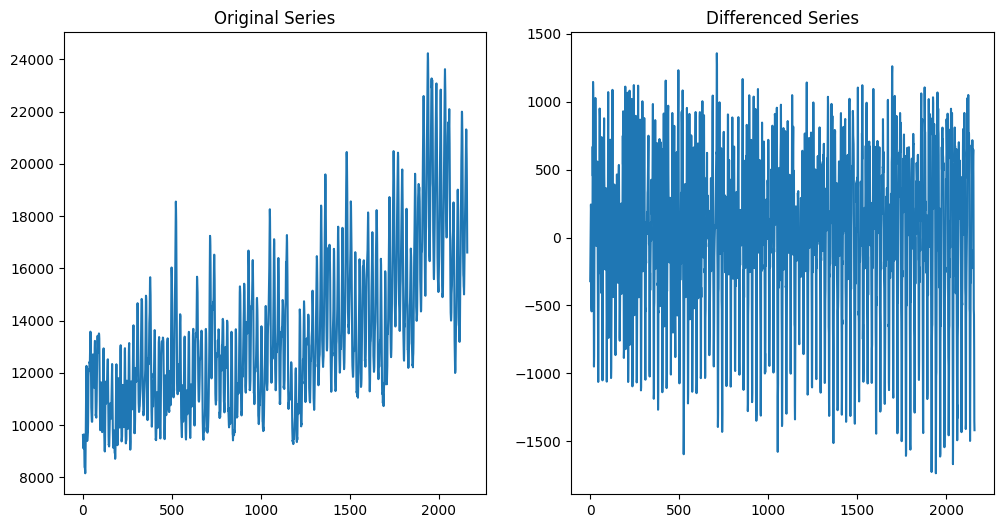

ADF Statistic: -9.453004127098996
p-value: 4.562889846966096e-16
KPSS Statistic: 0.0048126261234666115
p-value: 0.1


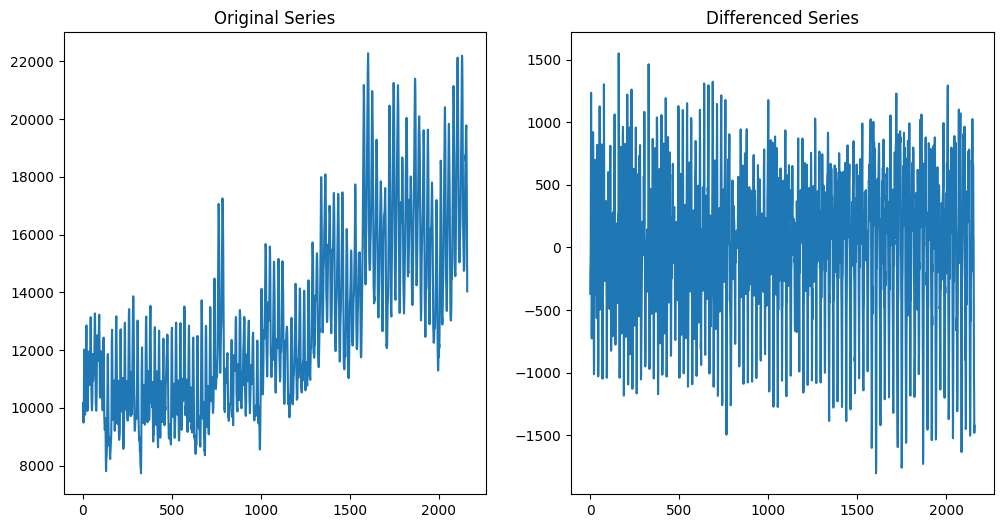

ADF Statistic: -8.670836824281592
p-value: 4.551143384971339e-14
KPSS Statistic: 0.006838646744150022
p-value: 0.1


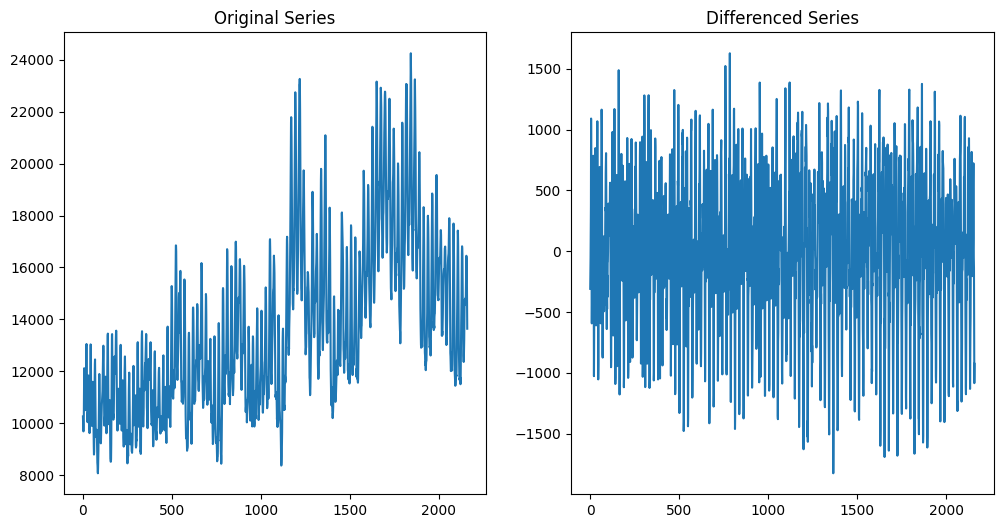

In [10]:
import warnings
warnings.filterwarnings("ignore")

def make_stationary(utility_df):
    # First-order differencing
    utility_df['load_diff'] = utility_df['load'].diff()
    
    # Drop NA from diff
    diff_series = utility_df['load_diff'].dropna()
    
    # Re-run ADF
    adf_result = adfuller(diff_series)
    print("ADF Statistic:", adf_result[0])
    print("p-value:", adf_result[1])
    
    # Re-run KPSS
    from statsmodels.tsa.stattools import kpss
    kpss_result = kpss(diff_series, regression='c', nlags="auto")
    print("KPSS Statistic:", kpss_result[0])
    print("p-value:", kpss_result[1])

    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(utility_df['load'])
    plt.title('Original Series')
    plt.subplot(1, 2, 2)
    plt.plot(diff_series)
    plt.title('Differenced Series')
    plt.show()
    
    return diff_series


diff_series = make_stationary(utility1) 
diff_series = make_stationary(utility2)
diff_series = make_stationary(utility3) 